In [68]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [41]:
mnist = tf.keras.datasets.mnist

In [61]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

#normalise data from (0-255)
x_train = tf.keras.utils.normalize(x_train,axis=1)  
x_test = tf.keras.utils.normalize(x_test,axis=1)
# defining model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) # input layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) # 1st hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.tanh)) # 2nd hidden layer
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # output layer
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',metrics=['accuracy'] )

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2502 - acc: 0.9267
Epoch 2/3
60000/60000 [==============================] - 5s 76us/sample - loss: 0.1011 - acc: 0.9685
Epoch 3/3
60000/60000 [==============================] - 4s 71us/sample - loss: 0.0697 - acc: 0.9777


In [62]:
val_loss,val_acc = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 46us/sample - loss: 0.1032 - acc: 0.9702


In [63]:
model.save('mnist.model') # save model

In [65]:
predictions = model.predict([x_test])

In [66]:
print(predictions)

[[6.32996162e-08 9.98566350e-08 1.62334381e-05 ... 9.99980330e-01
  3.54906831e-07 1.01844975e-07]
 [4.15517643e-05 1.48508989e-04 9.99762595e-01 ... 4.29774758e-07
  2.07430276e-07 1.08474907e-09]
 [3.52670412e-07 9.99532700e-01 3.62156934e-05 ... 3.39430495e-04
  3.27997841e-05 2.20581546e-06]
 ...
 [3.45693998e-08 3.75201978e-07 1.34703527e-07 ... 3.29169525e-05
  1.55404382e-06 4.40846452e-05]
 [5.20121102e-06 8.43704256e-05 1.39029116e-05 ... 6.83498854e-07
  3.44702117e-02 1.24272335e-08]
 [8.40122902e-06 1.99231295e-07 2.31999438e-05 ... 1.03023412e-08
  2.91946321e-06 3.56452205e-07]]


In [71]:
np.argmax(predictions[2])

1

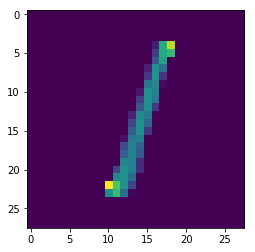

In [73]:
plt.imshow(x_test[2])